In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

import seaborn as sns
import joblib
import time

data = load_wine()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_model = DecisionTreeClassifier(max_depth=10)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Model Accuracy:", dt_accuracy)
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

svm_model = SVC(kernel='linear', max_iter=500)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Model Accuracy:", svm_accuracy)
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

print(f"Decision Tree Accuracy: {dt_accuracy}, SVM Accuracy: {svm_accuracy}")


Decision Tree Model Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

[[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]
SVM Model Accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36

[[14  0  0]
 [ 0 13  1]
 [ 0  0  8]]
Decision Tree Accuracy: 0.9444444444444444, SVM Accuracy: 0.9722222222222222

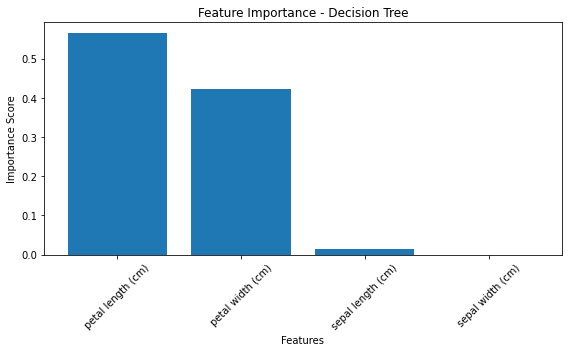

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 5))
plt.title("Feature Importance - Decision Tree")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()
